### Deep Learning

Aluno: Felipe Vasconcelos.


Matrícula: 20110898

In [6]:
# Dados do dataset

import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Estatisticas
import pandas as pd
df = pd.read_csv("diabetes.csv")
#df = df[(df != 0).all(axis=1)]


print("Quantidade de NaN")
qnt_nan = df.isna().sum()
print(qnt_nan)


print("\n Quantidade de zeros")
qnt_zero = (df == 0).sum()
print(qnt_zero)

print("\n Quantidade de nulos")
qnt_null = df.isnull().sum()
print(qnt_null)


Quantidade de NaN
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Quantidade de zeros
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

 Quantidade de nulos
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


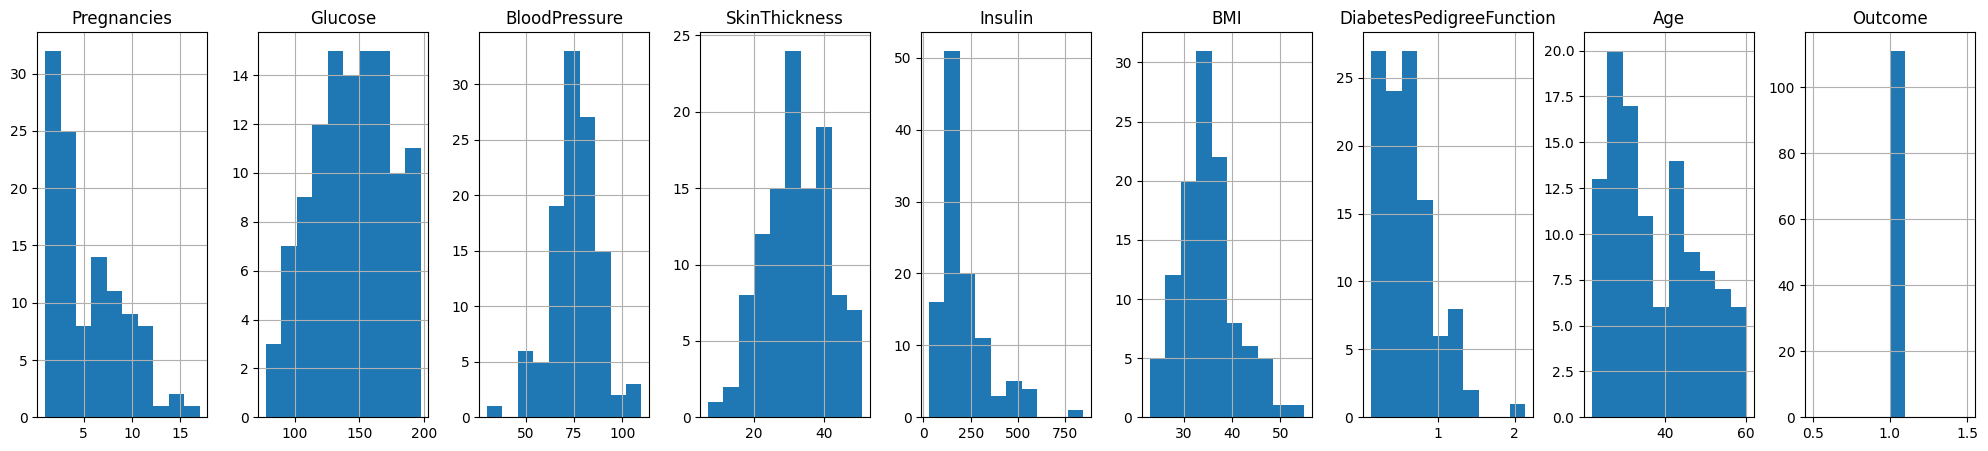

In [8]:
# Histogramas
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df = df[(df != 0).all(axis=1)]

fig, axes = plt.subplots(1, len(df.columns), figsize=(25, 5))

for i, column in enumerate(df.columns):
    df.hist(column=[column], ax=axes[i])
    axes[i].set_title(column)


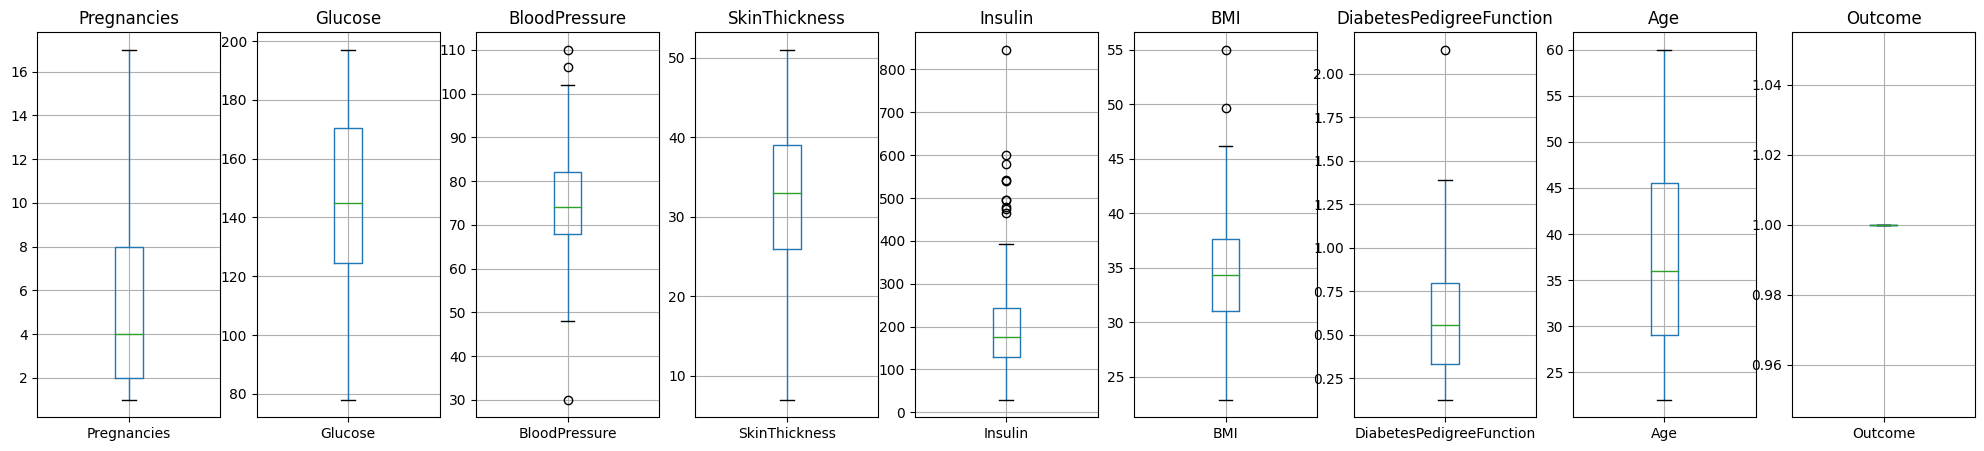

In [9]:
# Boxplots

import matplotlib.pyplot as plt
df = pd.read_csv("diabetes.csv")
df = df[(df != 0).all(axis=1)]

fig, axes = plt.subplots(1, len(df.columns), figsize=(25, 5)) 

for i, column in enumerate(df.columns):
    df.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(column)

### Scikit

In [2]:
# Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('diabetes.csv')

# Pre processamento 
feature_cols = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']
X = data[feature_cols+['Outcome']]
y = X.Outcome
X = X.drop(columns=['Outcome'])

X[feature_cols] = X[feature_cols].replace(0, pd.NA)
X[feature_cols] = X[feature_cols].fillna(X.mean())

def clusteringAge(x):
    if x < 25:
        return 0
    elif x < 40:
        return 1
    elif x < 55:
        return 2
    else:
        return 3
    
def clusteringGlucose(x):
    if x < 70:
        return 0
    elif x < 100:
        return 1 
    elif x < 126:
        return 2
    else:
        return 3
    
        
def clusteringBMI(x):
    if x < 19:
        return 0
    elif x < 25:
        return 1 
    elif x < 30:
        return 2
    else:
        return 3

X['BMI'] = X['BMI'].apply(clusteringBMI)

X['Age'] = X['Age'].apply(clusteringAge)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
logistic_model = LogisticRegression(random_state=42,max_iter=100000).fit(X_train, y_train)
pred = logistic_model.predict(X_test)

scr = logistic_model.score(X_test,y_test)
print(f'Score do logistic_model: {scr}')

Score do logistic_model: 0.7837398373983739


In [4]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
resultados = []

for train_index, test_index in kf.split(X_test):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logistic_model = LogisticRegression(random_state=0, max_iter=10000)
    logistic_model.fit(X_train, y_train)
    
    acc = logistic_model.score(X_test, y_test)
    resultados.append(acc)


media_acc = sum(resultados) / len(resultados)

print("k:", resultados)
print("media:", media_acc)

k: [0.8548387096774194, 0.7419354838709677, 0.8225806451612904, 0.8709677419354839, 0.7258064516129032, 0.7868852459016393, 0.7540983606557377, 0.7377049180327869, 0.639344262295082, 0.8032786885245902]
media: 0.77374405076679


## Tensorflow

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc

data = pd.read_csv('diabetes.csv')

# Pre processamento

feature_cols = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']
f2 = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
X = data[f2]
X = X[(X[feature_cols] != 0).all(axis=1)]
y = X.Outcome
X = X.drop(columns=['Outcome'])

X[feature_cols] = X[feature_cols].replace(0, pd.NA)
X[feature_cols] = X[feature_cols].fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo 
keras_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = keras_model.fit(X_train, y_train,epochs=100, verbose=2, validation_data=(X_test, y_test))

loss, acc = keras_model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {acc * 100:.2f}%')


Epoch 1/100
3/3 - 0s - loss: 0.7152 - accuracy: 0.4835 - val_loss: 0.6895 - val_accuracy: 0.5574 - 469ms/epoch - 156ms/step
Epoch 2/100
3/3 - 0s - loss: 0.6823 - accuracy: 0.6374 - val_loss: 0.6633 - val_accuracy: 0.6339 - 20ms/epoch - 7ms/step
Epoch 3/100
3/3 - 0s - loss: 0.6543 - accuracy: 0.7033 - val_loss: 0.6388 - val_accuracy: 0.6585 - 20ms/epoch - 7ms/step
Epoch 4/100
3/3 - 0s - loss: 0.6287 - accuracy: 0.6923 - val_loss: 0.6166 - val_accuracy: 0.6694 - 24ms/epoch - 8ms/step
Epoch 5/100
3/3 - 0s - loss: 0.6055 - accuracy: 0.6923 - val_loss: 0.5967 - val_accuracy: 0.6749 - 19ms/epoch - 6ms/step
Epoch 6/100
3/3 - 0s - loss: 0.5817 - accuracy: 0.7143 - val_loss: 0.5790 - val_accuracy: 0.6776 - 20ms/epoch - 7ms/step
Epoch 7/100
3/3 - 0s - loss: 0.5633 - accuracy: 0.7582 - val_loss: 0.5628 - val_accuracy: 0.6995 - 25ms/epoch - 8ms/step
Epoch 8/100
3/3 - 0s - loss: 0.5456 - accuracy: 0.7582 - val_loss: 0.5480 - val_accuracy: 0.7213 - 28ms/epoch - 9ms/step
Epoch 9/100
3/3 - 0s - loss: 

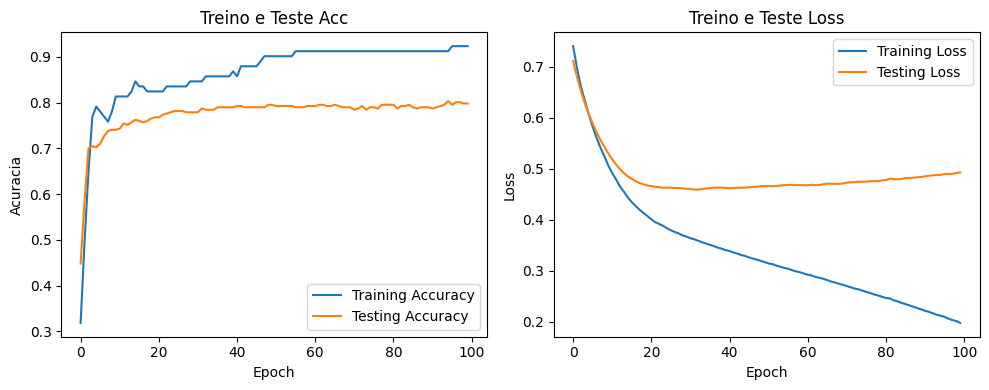

In [13]:

# Acuracia 

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acuracia')
plt.title('Treino e Teste Acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Treino e Teste Loss')
plt.legend()

plt.tight_layout()
plt.show()


12/12 [==============================] - 0s 563us/step


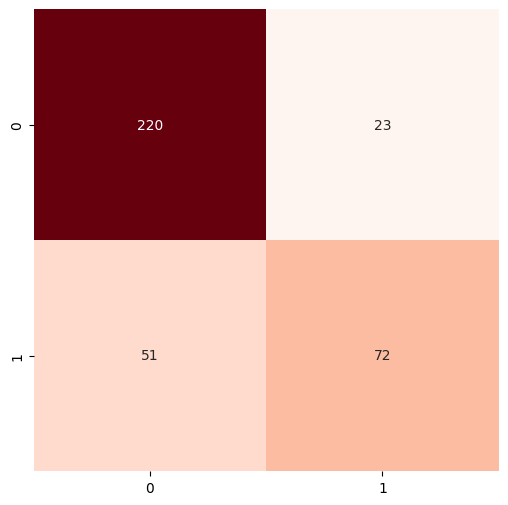

In [14]:
# Matriz
y_pred = (keras_model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.show()


12/12 [==============================] - 0s 539us/step


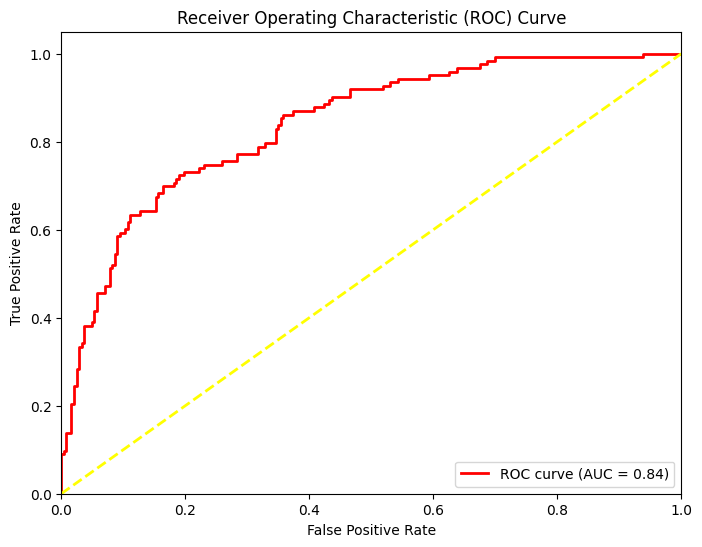

In [15]:

# ROC
y_prob = keras_model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()